In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#reading the training and the test set
train_df=pd.read_csv("C:/Users/pfali/Downloads/playground-series-s4e10/train.csv")
test_df=pd.read_csv("C:/Users/pfali/Downloads/playground-series-s4e10/test.csv")

#previewing first 5 rows
train_df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [2]:
#previewing statistical values of the data
train_df.describe(include='all')

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645,58645.000000,58645,58645,58645.000000,58645.000000,58645.000000,58645,58645.000000,58645.000000
unique,NaN,NaN,NaN,4,NaN,6,7,NaN,NaN,NaN,2,NaN,NaN
top,NaN,NaN,NaN,RENT,NaN,EDUCATION,A,NaN,NaN,NaN,N,NaN,NaN
freq,NaN,NaN,NaN,30594,NaN,12271,20984,NaN,NaN,NaN,49943,NaN,NaN
mean,29322.000000,27.550857,6.404617e+04,NaN,4.701015,NaN,NaN,9217.556518,10.677874,0.159238,NaN,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,NaN,3.959784,NaN,NaN,5563.807384,3.034697,0.091692,NaN,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,NaN,0.000000,NaN,NaN,500.000000,5.420000,0.000000,NaN,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,NaN,2.000000,NaN,NaN,5000.000000,7.880000,0.090000,NaN,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,NaN,4.000000,NaN,NaN,8000.000000,10.750000,0.140000,NaN,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,NaN,7.000000,NaN,NaN,12000.000000,12.990000,0.210000,NaN,8.000000,0.000000


The training dataset is of rather small size with almost 60k of instances. Target is a binary value, so our model will deal with a classification task. 
In the set there are both categorical and numerical features. The first ones have in total 20 values, so if they are to be one-hot encoded, the number of features in the set will increase highly, which can worsen the model's performance. Thus, in this version of the model, we would probably decide on converting the values of these features into numerical categories. 
Numerical features, on the other hand, have different scales, so would either require rescaling or bucketizing - the latter would be considered for the features with the highest values. Some of the numerical features also have outliers and they will be excluded in this model's version.


In [3]:
#verifying if there are any null values in the training set
train_df.isnull().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [4]:
#verifying if there are any null values in the test set
test_df.isnull().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [5]:
#checking the types of data
train_df.dtypes

id                              int64
person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
loan_status                     int64
dtype: object

In [6]:
#checking the types of data
test_df.dtypes

id                              int64
person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

There are no missing values and the data types don't require more enginnering than it was stated before.

In [7]:
numerical_features=['person_age','person_income','person_emp_length','loan_amnt','loan_int_rate','loan_percent_income','cb_person_cred_hist_length']
categorical_features=['person_home_ownership','loan_intent','loan_grade','cb_person_default_on_file']

C:\Users\pfali\AppData\Local\Temp\ipykernel_12648\964328818.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['loan_status']==0, f], kde=True, color='green', label='loan_status=0')
C:\Users\pfali\AppData\Local\Temp\ipykernel_12648\964328818.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe

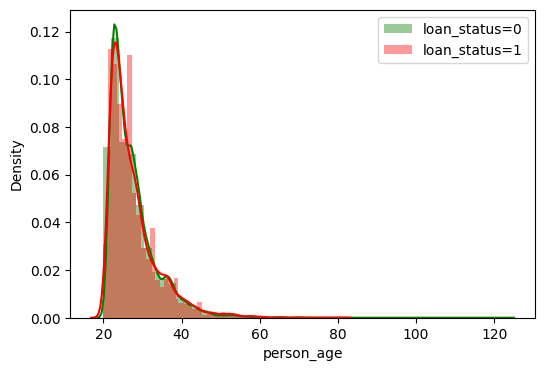

C:\Users\pfali\AppData\Local\Temp\ipykernel_12648\964328818.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['loan_status']==0, f], kde=True, color='green', label='loan_status=0')
C:\Users\pfali\AppData\Local\Temp\ipykernel_12648\964328818.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe

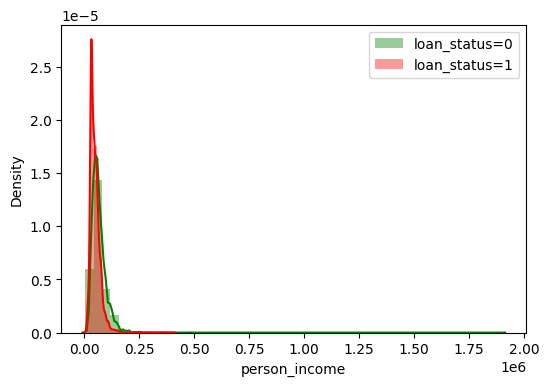

C:\Users\pfali\AppData\Local\Temp\ipykernel_12648\964328818.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['loan_status']==0, f], kde=True, color='green', label='loan_status=0')
C:\Users\pfali\AppData\Local\Temp\ipykernel_12648\964328818.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe

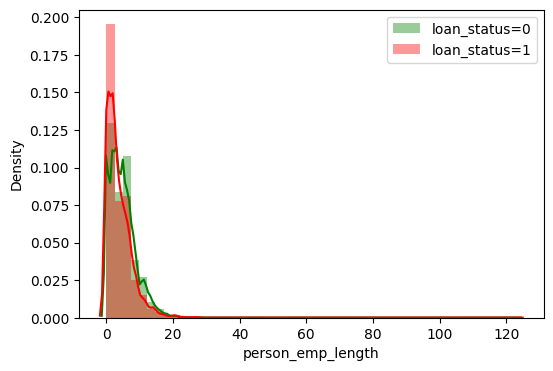

C:\Users\pfali\AppData\Local\Temp\ipykernel_12648\964328818.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['loan_status']==0, f], kde=True, color='green', label='loan_status=0')
C:\Users\pfali\AppData\Local\Temp\ipykernel_12648\964328818.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe

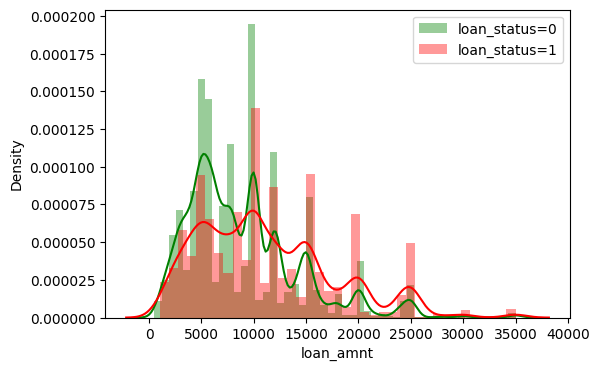

C:\Users\pfali\AppData\Local\Temp\ipykernel_12648\964328818.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['loan_status']==0, f], kde=True, color='green', label='loan_status=0')
C:\Users\pfali\AppData\Local\Temp\ipykernel_12648\964328818.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe

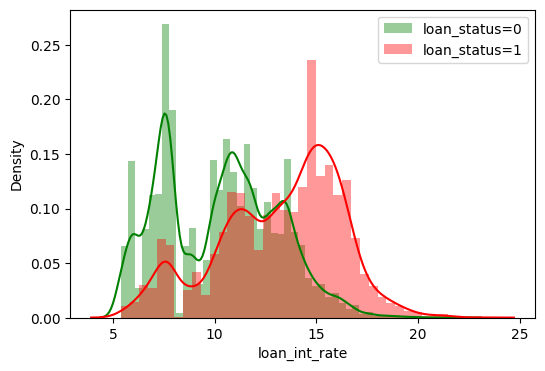

C:\Users\pfali\AppData\Local\Temp\ipykernel_12648\964328818.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['loan_status']==0, f], kde=True, color='green', label='loan_status=0')
C:\Users\pfali\AppData\Local\Temp\ipykernel_12648\964328818.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe

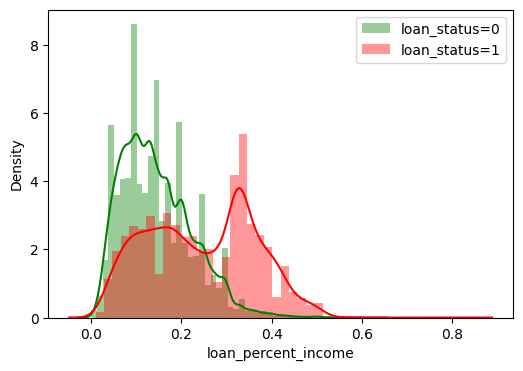

C:\Users\pfali\AppData\Local\Temp\ipykernel_12648\964328818.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['loan_status']==0, f], kde=True, color='green', label='loan_status=0')
C:\Users\pfali\AppData\Local\Temp\ipykernel_12648\964328818.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe

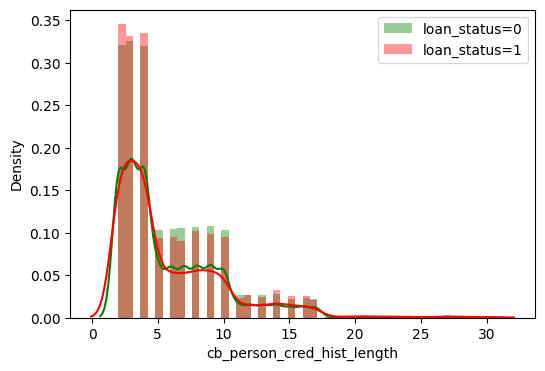

In [8]:
for f in numerical_features:
    plt.figure(figsize=(6,4))
    sns.distplot(train_df.loc[train_df['loan_status']==0, f], kde=True, color='green', label='loan_status=0')
    sns.distplot(train_df.loc[train_df['loan_status']==1, f], kde=True, color='red', label='loan_status=1')
    plt.legend(loc='upper right')
    plt.show()

From the above, it can be noticed that certain features will not be helpful in discerning between the target values. In this regard we can mention 'person_age', 'person_income', 'person_emp_length', 'cb_person_cred_hist_length'. These features will therefore be excluded in this model's version.

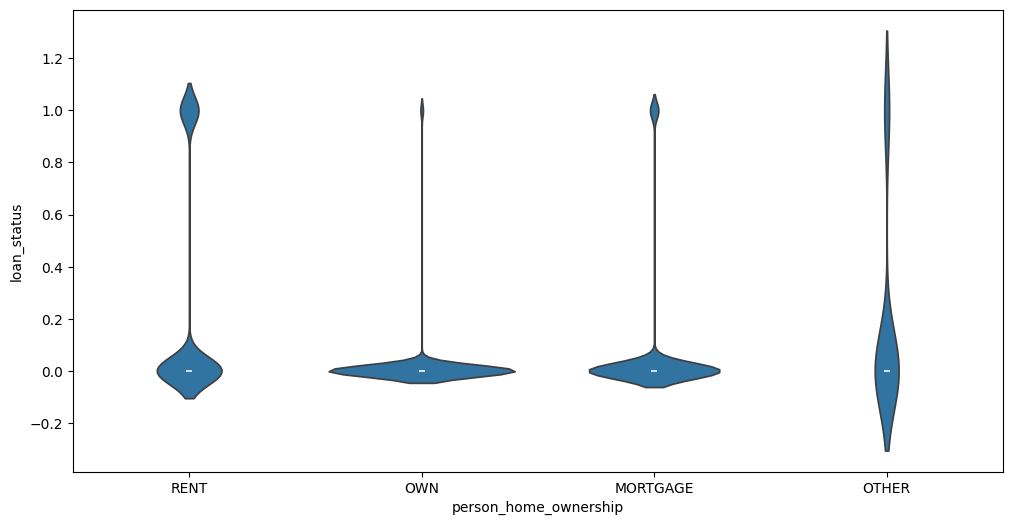

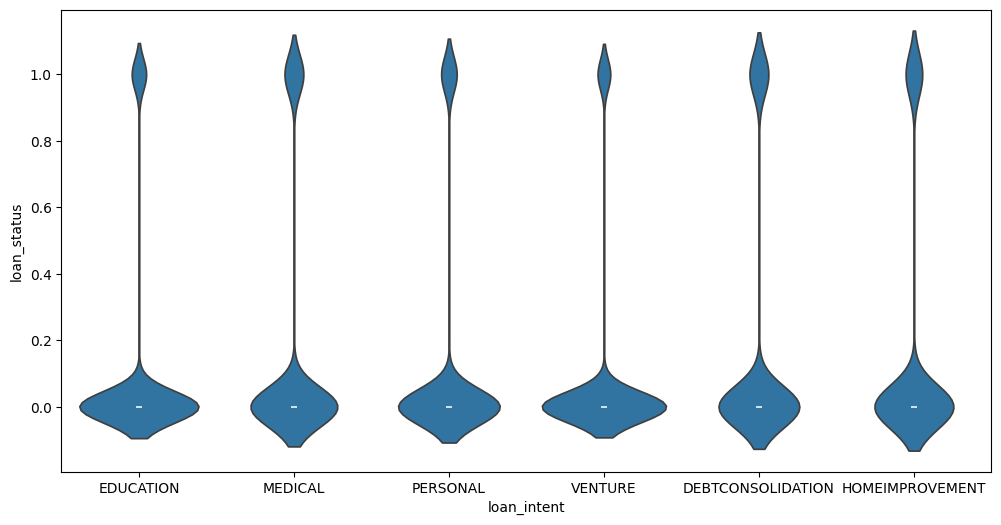

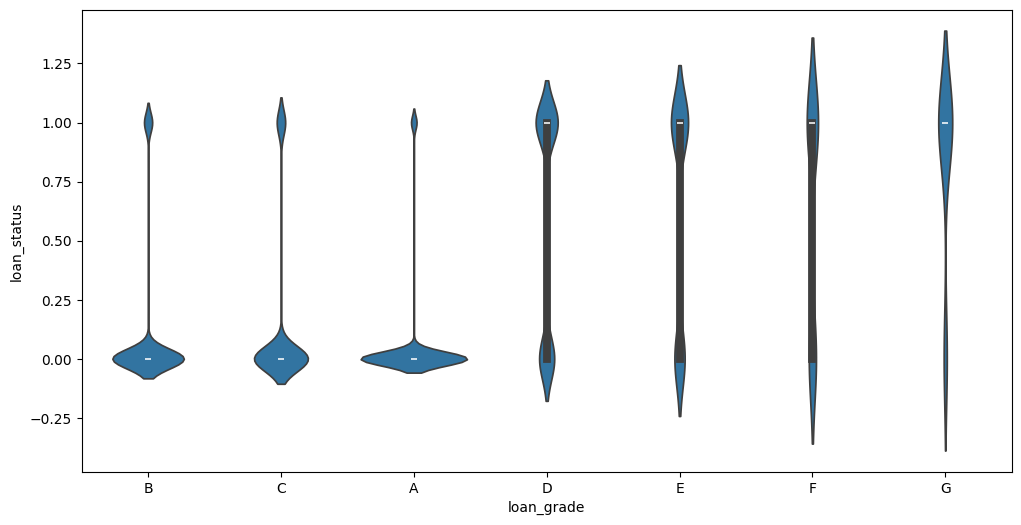

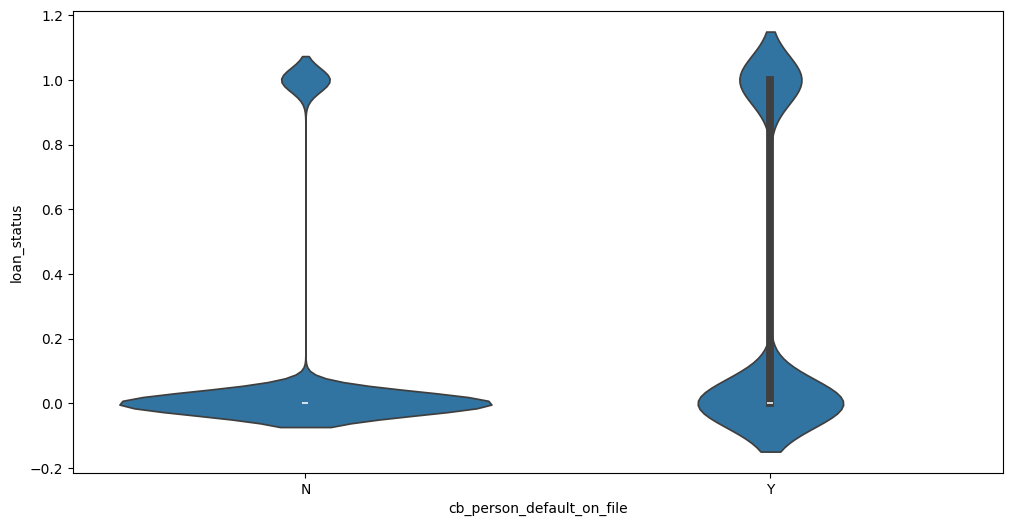

In [9]:
for f in categorical_features:
    plt.figure(figsize=(12,6))
    sns.violinplot(y=train_df['loan_status'],x=train_df[f])
    plt.show()

All above shown categorical values will be left for the training, as they will indicate well, what the target value will be for the certain value of a feature. Only some values of the 'loan_intent' have the same distribution (e.g. 'MEDICAL' and 'PERSONAL' for the target value=0), but in this version of the model we will leave them for training.

In [10]:
#dropping the features
train_df.drop(columns=['person_age', 'person_income', 'person_emp_length', 'cb_person_cred_hist_length','id'],inplace=True)
test_df.drop(columns=['person_age', 'person_income', 'person_emp_length', 'cb_person_cred_hist_length'],inplace=True)

In [11]:
#previewing statistical values of the data again to search for the features with outliers
train_df.describe(include='all')

,person_home_ownership,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,loan_status
count,58645,58645,58645,58645.000000,58645.000000,58645.000000,58645,58645.000000
unique,4,6,7,NaN,NaN,NaN,2,NaN
top,RENT,EDUCATION,A,NaN,NaN,NaN,N,NaN
freq,30594,12271,20984,NaN,NaN,NaN,49943,NaN
mean,NaN,NaN,NaN,9217.556518,10.677874,0.159238,NaN,0.142382
std,NaN,NaN,NaN,5563.807384,3.034697,0.091692,NaN,0.349445
min,NaN,NaN,NaN,500.000000,5.420000,0.000000,NaN,0.000000
25%,NaN,NaN,NaN,5000.000000,7.880000,0.090000,NaN,0.000000
50%,NaN,NaN,NaN,8000.000000,10.750000,0.140000,NaN,0.000000
75%,NaN,NaN,NaN,12000.000000,12.990000,0.210000,NaN,0.000000


From the table, it can be interpreted that 'loan_amnt', 'loan_int_rate' and 'loan_percent_income' have outliers. These features have also different scales, which can worsen model's performance, so they will require rescaling.

In [12]:
check=train_df['loan_amnt'].value_counts()
print(check.to_string())

loan_amnt
10000    7128
5000     5176
6000     4676
12000    4311
15000    3348
8000     3296
4000     2406
3000     2304
7000     2131
20000    1777
9000     1148
25000    1108
7500      971
2000      955
14000     853
16000     815
2500      675
4800      628
18000     606
3500      576
13000     526
7200      523
3600      498
9600      471
1500      458
4500      444
1000      406
11000     399
24000     382
6500      358
2400      355
5500      337
8500      328
5600      300
8400      273
6400      262
17000     255
4200      249
3200      215
14400     212
21000     177
1200      169
12500     167
1800      163
35000     155
2800      143
11200     136
9500      134
12800     116
11500     114
30000     111
7800      111
10500     105
14500     104
24250     103
10800     102
5400       96
22000      94
10400      88
17500      88
1600       84
6600       82
6800       78
5200       76
12250      73
10200      70
13500      68
4750       66
9800       66
19000      66
13200     

In [13]:
check=train_df['loan_percent_income'].value_counts()
print(check.to_string())

loan_percent_income
0.100    3248
0.130    3226
0.080    2834
0.170    2795
0.070    2725
0.110    2694
0.090    2631
0.120    2518
0.140    2451
0.060    2449
0.150    2429
0.200    2357
0.050    2137
0.160    1981
0.190    1736
0.040    1689
0.180    1580
0.210    1533
0.250    1438
0.230    1336
0.220    1307
0.240    1161
0.030    1129
0.270     970
0.300     826
0.330     809
0.290     742
0.260     725
0.280     705
0.310     535
0.320     462
0.020     423
0.340     374
0.360     374
0.400     324
0.380     308
0.350     298
0.370     225
0.420     188
0.010     138
0.390     134
0.430     120
0.410     119
0.440      91
0.500      77
0.470      69
0.450      67
0.480      51
0.460      42
0.490      23
0.510      20
0.520       8
0.530       4
0.000       2
0.560       2
0.384       1
0.550       1
0.830       1
0.540       1
0.590       1
0.630       1


In [14]:
check=train_df['loan_int_rate'].sort_values(ascending=False).value_counts()
print(check.to_string())

loan_int_rate
10.99    2183
7.51     2150
7.88     1759
7.49     1609
13.49    1412
11.49    1306
7.90     1295
5.42     1117
6.03     1083
11.71    1072
9.99      978
6.62      972
7.14      947
10.65     885
7.29      875
10.37     828
5.79      811
11.99     776
8.49      764
8.90      721
12.69     703
10.59     700
9.91      687
6.99      685
9.63      683
12.42     642
8.94      629
12.53     578
5.99      562
11.86     539
10.25     511
14.27     506
11.83     499
6.91      495
6.54      495
11.36     491
12.99     489
11.11     488
10.74     487
7.66      475
14.96     448
10.62     431
11.14     417
10.00     415
12.18     404
10.75     401
11.48     400
6.92      400
8.59      363
6.17      362
10.36     357
13.61     356
6.76      356
12.73     352
13.98     343
13.48     338
12.21     337
13.22     337
9.88      335
13.11     334
12.87     332
9.32      328
10.38     318
13.16     311
11.12     309
13.85     302
8.00      301
13.99     297
15.62     285
7.74      284
11.89 

When the count of each value of the above features is taken into consideration, it can be stated that although there are some outliers, they can't be easily removed, because some of them occur in many instances. For example, there are 155 instances with 'loan_amnt' of 35000. We will exclude from the set the values higher than 0.53 for 'loan_percent_income', lower than 1000 for 'loan_amnt' and higher than 19.47 for 'loan_int_rate'. 

In [15]:
filter1=train_df[train_df['loan_amnt']<1000].index
train_df.drop(filter1,inplace=True)
filter2=train_df[train_df['loan_percent_income']>0.53].index
train_df.drop(filter2,inplace=True)
filter3=train_df[train_df['loan_int_rate']>19.47].index
train_df.drop(filter3,inplace=True)

In [17]:
train_df['person_home_ownership'].replace(['RENT','MORTGAGE','OWN','OTHER'],[4,3,2,1],inplace=True)
test_df['person_home_ownership'].replace(['RENT','MORTGAGE','OWN','OTHER'],[4,3,2,1],inplace=True)
train_df['loan_intent'].replace(['HOMEIMPROVEMENT','DEBTCONSOLIDATION','VENTURE','PERSONAL','MEDICAL','EDUCATION'],[1,2,3,4,5,6],inplace=True)
test_df['loan_intent'].replace(['HOMEIMPROVEMENT','DEBTCONSOLIDATION','VENTURE','PERSONAL','MEDICAL','EDUCATION'],[1,2,3,4,5,6],inplace=True)
train_df['loan_grade'].replace(['A','B','C','D','E','F','G'],[1,2,3,4,5,6,7],inplace=True)
test_df['loan_grade'].replace(['A','B','C','D','E','F','G'],[1,2,3,4,5,6,7],inplace=True)
train_df['cb_person_default_on_file'].replace(['Y','N'],[1,2],inplace=True)
test_df['cb_person_default_on_file'].replace(['Y','N'],[1,2],inplace=True)

C:\Users\pfali\AppData\Local\Temp\ipykernel_12648\4283690389.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['person_home_ownership'].replace(['RENT','MORTGAGE','OWN','OTHER'],[4,3,2,1],inplace=True)
C:\Users\pfali\AppData\Local\Temp\ipykernel_12648\4283690389.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_sile

In [28]:
numerical=train_df.columns.tolist()
numerical.remove('loan_status')
print(numerical)

['person_home_ownership', 'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file']


In [29]:
import sklearn
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X=train_df.drop(['loan_status'],axis=1)
y=train_df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)
numerical_transformer=Pipeline(steps=[("scaler",StandardScaler())])
transformer=ColumnTransformer(transformers=[('categorical',numerical_transformer,numerical)])
final_pipeline=Pipeline(steps=[('transformer',transformer),('model',GradientBoostingClassifier())])
params={'model__n_estimators':[100,200,300,400,500,1000],'model__learning_rate':[1.0,0.1,0.5]}
gsearch1=GridSearchCV(final_pipeline,param_grid=params,scoring='f1_macro')
gsearch1.fit(X_train, y_train)
print("The best parameters are:", gsearch1.best_params_)
model=gsearch1.best_estimator_
print(model.score(X_train,y_train))

The best parameters are: {'model__learning_rate': 0.1, 'model__n_estimators': 300}
0.945534860421695
